In [1]:
import numpy as np
import pandas as pd
import re #text cleaning (preprocessing)
import nltk #natural language toolkit, used for preprocessing
import string 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df_Whole = pd.read_csv("D:/AI/twcs.csv" , nrows=5000)
df=df_Whole[["text"]]
df_Whole.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


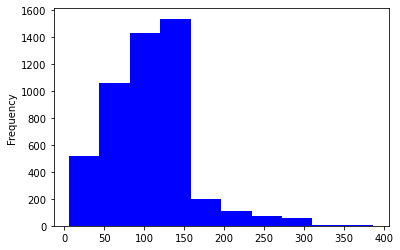

In [3]:
length_tweet = df['text'].str.len().plot.hist(color = 'blue' , figsize = (6,4))

In [4]:
df_Whole['length'] = df['text'].str.len()
df_Whole['length'].describe()

count    5000.000000
mean      107.410600
std        50.893906
min         6.000000
25%        72.000000
50%       108.000000
75%       134.000000
max       387.000000
Name: length, dtype: float64

In [5]:
df_Whole[df_Whole['length']==387] ['text'].iloc[0]

'@marksandspencer @117241 @117244 @117242 @Tesco @sainsburys @117248 @AldiUK @117249 @Morrisons @117250 @117251 @117243 @117247 Imagine making your customers pay more than twice as much per pie for your top range and still only scoring a point higher than our basics. ;)\n\nJust you wait till our Deluxe mince pies get marked! And on that note, @117242 drop us a DM! https://t.co/8X2QAr23zN'

In [6]:
print(df_Whole)


      tweet_id     author_id  inbound                      created_at  \
0            1    sprintcare    False  Tue Oct 31 22:10:47 +0000 2017   
1            2        115712     True  Tue Oct 31 22:11:45 +0000 2017   
2            3        115712     True  Tue Oct 31 22:08:27 +0000 2017   
3            4    sprintcare    False  Tue Oct 31 21:54:49 +0000 2017   
4            5        115712     True  Tue Oct 31 21:49:35 +0000 2017   
...        ...           ...      ...                             ...   
4995      7627  hulu_support    False  Thu Nov 02 15:29:37 +0000 2017   
4996      7628  hulu_support    False  Thu Nov 02 15:31:46 +0000 2017   
4997      7626        117290     True  Mon Oct 30 02:13:57 +0000 2017   
4998      7629  hulu_support    False  Tue Oct 31 23:40:03 +0000 2017   
4999      7630        117291     True  Mon Oct 30 01:57:36 +0000 2017   

                                                   text response_tweet_id  \
0     @115712 I understand. I would like to as

In [7]:
#.......................changing the casing of the words................................
df = df_Whole.iloc[:,4:5]
df["text"] = df['text'].astype(str)
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.


In [8]:
#Remove punctuations
df.drop(["text_lower"], axis=1, inplace=True)
puncremove = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',puncremove))
df["text_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_punct
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...
4,@sprintcare I did.,sprintcare I did


In [10]:
pip install -U nltk

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.3
    Uninstalling nltk-3.6.3:
      Successfully uninstalled nltk-3.6.3
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import re #text cleaning (preprocessing)
import nltk #natural language toolkit, used for preprocessing
import string 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
stops = set(stopwords.words('english'))
print(stops)

{'both', 'she', 'where', 'there', 're', 'o', 'if', 'them', 'we', 'of', 'about', 'over', 'hadn', "hadn't", 'for', 'has', 'll', 'couldn', 'under', 'not', 'him', 'm', 'which', 'you', 'will', 'aren', 'before', "you're", 've', 'in', 'as', "haven't", 'out', "you'll", 'do', 'such', 'haven', 'does', 'down', 'a', 'doesn', 'can', 'then', 'ourselves', 'wouldn', 'my', 'against', "wouldn't", 'than', "didn't", 'own', 'so', 'nor', 'this', "shan't", 'don', 'again', 'because', 'me', 'above', 'myself', 'by', 'through', 'few', "won't", 'her', 'mustn', 'our', 'to', 'and', 'hers', 'what', 'while', "should've", 'further', 'am', 'their', 'once', 'whom', 'only', 'was', 'here', 'wasn', "weren't", 'at', 'why', 'very', 'these', 'd', 'who', 'just', 'until', 'too', 'they', 'yourselves', "mustn't", "isn't", 'now', 'some', "you've", 'he', 'himself', "needn't", 'won', "you'd", 'your', 'when', 'should', 'each', 'how', "aren't", 'being', 'it', 'having', 'its', 'theirs', 'an', 'any', 'into', 'i', 'is', 'ain', "don't", "

In [10]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_stop"] = df["text_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,text,text_punct,text_stop
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...
4,@sprintcare I did.,sprintcare I did,sprintcare I


In [11]:
from collections import Counter
cnt = Counter()
for text in df["text_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 1437),
 ('us', 752),
 ('DM', 514),
 ('help', 479),
 ('Please', 376),
 ('We', 338),
 ('Hi', 293),
 ('Thanks', 287),
 ('get', 279),
 ('please', 247)]

In [12]:
freqwords = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in freqwords])

df["text_stopfreq"] = df["text_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,text,text_punct,text_stop,text_stopfreq
0,@115712 I understand. I would like to assist y...,115712 I understand I would like to assist you...,115712 I understand I would like assist We wou...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare I have sent several private message...,sprintcare I sent several private messages one...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,115712 Please send us a Private Message so tha...,115712 Please send us Private Message assist J...,115712 send Private Message assist Just click ...
4,@sprintcare I did.,sprintcare I did,sprintcare I,sprintcare


In [13]:
df.drop(["text_punct", "text_stop"], axis=1, inplace=True)

In [14]:
#stemming(playing-play)
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head(10)

,text,text_stopfreq,text_stemmed
0,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,sprintcare propose,@sprintcar and how do you propos we do that
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...
3,@115712 Please send us a Private Message so th...,115712 send Private Message assist Just click ...,@115712 pleas send us a privat messag so that ...
4,@sprintcare I did.,sprintcare,@sprintcar i did.
5,@115712 Can you please send us a private messa...,115712 Can send private message gain details a...,@115712 can you pleas send us a privat message...
6,@sprintcare is the worst customer service,sprintcare worst customer service,@sprintcar is the worst custom servic
7,@115713 This is saddening to hear. Please shoo...,115713 This saddening hear shoot look KC,@115713 thi is sadden to hear. pleas shoot us ...
8,@sprintcare You gonna magically change your co...,sprintcare You gonna magically change connecti...,@sprintcar you gonna magic chang your connect ...
9,@115713 We understand your concerns and we'd l...,115713 understand concerns wed like send Direc...,@115713 we understand your concern and we'd li...


In [15]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [16]:
#lemminizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,text_stopfreq,text_stemmed,text_lemmatized
0,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...,@115712 i understand. i would like to assist y...,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that,sprintcare propose,@sprintcar and how do you propos we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,sprintcare sent several private messages one r...,@sprintcar i have sent sever privat messag and...,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...,115712 send Private Message assist Just click ...,@115712 pleas send us a privat messag so that ...,@115712 Please send u a Private Message so tha...
4,@sprintcare I did.,sprintcare,@sprintcar i did.,@sprintcare I did.


In [17]:
lemmatizer.lemmatize("sleeping")

'sleeping'

In [18]:
lemmatizer.lemmatize("sleeping","v") # v1

'sleep'

In [19]:
print("The Word is : stripes")
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

The Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


In [20]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [21]:
s = 'a\tb\nc\td'
print(s)

a	b
c	d


In [22]:
s = r'a\tb\nc\td'
print(s)

a\tb\nc\td


In [23]:
#removal url
text1 = "This is my website, https://www.abc.com, check it out"
remove_urls(text1)

'This is my website,  check it out'

In [24]:
text = "Want to learn more. Checkout www.h2o.ai for additional information"
remove_urls(text)

'Want to learn more. Checkout  for additional information'

In [25]:
import numpy as np
import pandas as pd
import re  # used for preprocessing
import nltk  # Natural Language Toolkit, used for preprocessing
import string #used for preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))


In [26]:
df_whole = pd.read_csv("D:/AI/twcs.csv", nrows=5000)
df = df_whole[["text"]]
df_whole.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


D:/AI/twcs.csv

In [27]:
df = df_whole.iloc[:,4:5]
df["text"] = df["text"].astype(str)
df.head()

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [28]:
# remove all urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# make all text lowercase
def text_lowercase(text):
    return text.lower()
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [29]:
pp_text_train = [] # our preprocessed text column
for text_data in df['text']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
df['pp_text'] = pp_text_train # add the preprocessed text as a column

In [30]:
df.head()

,text,pp_text
0,@115712 I understand. I would like to assist y...,understand would like assist would need get pr...
1,@sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,sprintcare sent several private message one re...
3,@115712 Please send us a Private Message so th...,please send u private message assist click ‘ m...
4,@sprintcare I did.,sprintcare


In [31]:
final_text_data = list(df['pp_text'])

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()

# the vectorizer must be fit onto the entire corpus
fitted_vectorizer = tf.fit(final_text_data)

transform_all = fitted_vectorizer.transform(df['pp_text'])

In [33]:
print(transform_all)

  (0, 6592)	0.4454853089146968
  (0, 6190)	0.3034434132572768
  (0, 5195)	0.39652227962666964
  (0, 4538)	0.3569872924294605
  (0, 3919)	0.211805085603221
  (0, 3433)	0.2494122396698877
  (0, 3418)	0.20346740590382362
  (0, 2468)	0.19122283290246225
  (0, 428)	0.4896550547298487
  (1, 5529)	0.5809623692215399
  (1, 4581)	0.8139304181246056
  (2, 6292)	0.4460026583311189
  (2, 5529)	0.3454828856031298
  (2, 5260)	0.39051486925059314
  (2, 5228)	0.2852223952742473
  (2, 4934)	0.40152195029994797
  (2, 4538)	0.39051486925059314
  (2, 4106)	0.244352191309585
  (2, 3700)	0.27283656933931216
  (3, 5997)	0.3463374899646776
  (3, 5221)	0.22529209687753776
  (3, 4560)	0.40364811725929683
  (3, 4538)	0.3863660407684735
  (3, 4399)	0.16782732825684352
  (3, 3700)	0.5398759093336265
  :	:
  (4997, 5944)	0.19135392350771327
  (4997, 5631)	0.3170425915581468
  (4997, 4106)	0.19837926308508985
  (4997, 3644)	0.28824725303020676
  (4997, 3492)	0.37490173420019673
  (4997, 3419)	0.3929577418697719
  (4